<a href="https://colab.research.google.com/github/dragoa/MachineLearning/blob/main/ML-NLP/CS224N/00_Gensim_word_vector_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gensim word vector visualization of various word vectors

In [1]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import gensim.downloader as api

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

For looking at word vectors, I'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Our homegrown Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

Check out the [word2vec](https://code.google.com/archive/p/word2vec/) implementation on Google Code.

In [2]:
model = api.load("glove-wiki-gigaword-100")

### What is a word vector?
A word vector is a mathematical representation of a word that captures its meaning and context in a text. It is a vector of numerical values that represents the semantic and syntactic properties of a word. <br>
Take a vector of 300 elements (words). Each word is representated by a distribution of weights across those elements.

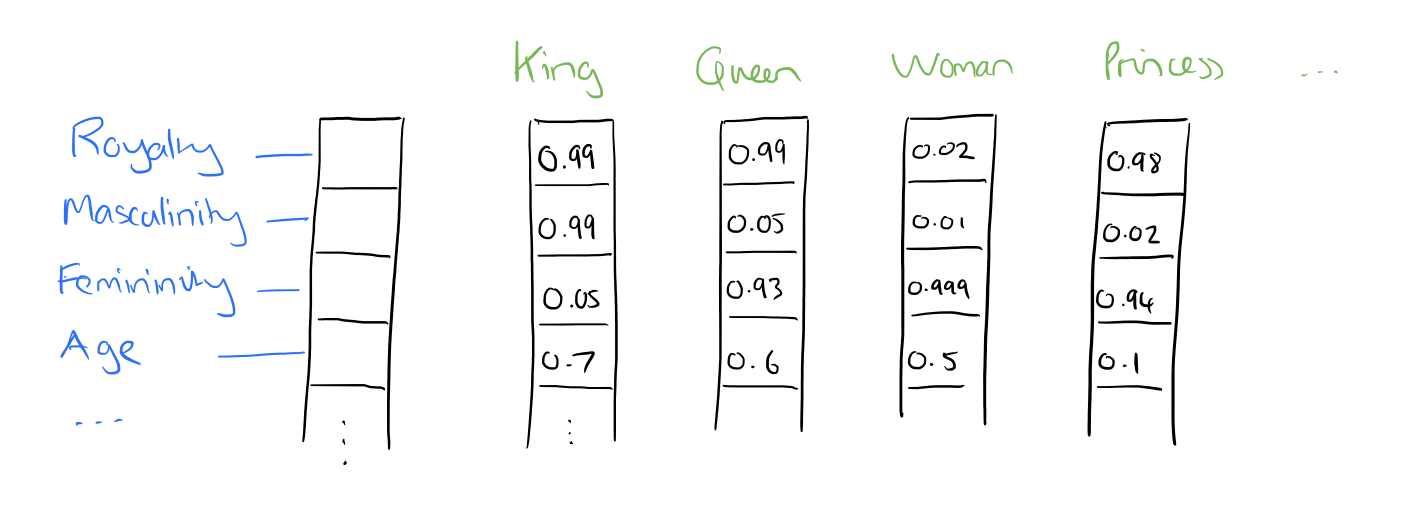

In [3]:
# Displayng word vectors
model['obama']

array([-0.44413  ,  0.59188  ,  0.98472  , -0.058361 ,  0.6077   ,
       -0.68421  ,  0.019399 ,  0.099464 , -0.13403  ,  0.24832  ,
       -0.24049  , -0.35876  , -0.29002  , -0.39814  ,  0.02137  ,
       -0.25071  , -0.013359 , -0.044295 , -0.29525  , -0.64601  ,
        0.29299  , -0.37601  , -0.3124   , -0.1293   , -0.93938  ,
        0.20459  , -0.72762  ,  0.2271   ,  0.44782  , -0.48476  ,
        0.7424   ,  1.1035   ,  0.6844   ,  0.86386  , -0.22639  ,
        0.68557  , -0.64844  , -0.48585  , -0.18262  ,  1.3293   ,
       -1.4314   , -0.95057  ,  0.94967  ,  0.55113  , -0.84357  ,
       -0.73851  , -0.13937  , -0.0097541, -0.28226  , -0.89138  ,
        0.15243  , -0.2845   ,  0.84001  ,  1.0873   , -0.016641 ,
       -2.5264   ,  0.50699  , -0.52419  ,  0.40204  ,  0.14475  ,
       -0.51315  ,  0.097834 ,  0.47384  , -0.67161  ,  0.52199  ,
        0.50871  ,  0.29222  ,  0.90184  , -0.2625   , -0.097745 ,
        0.21947  ,  0.12971  , -0.96543  , -0.20776  ,  0.0093

In [4]:
model.most_similar('obama')

[('barack', 0.9372164607048035),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960004448890686),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933662533760071),
 ('dole', 0.7851964831352234),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472624182701111)]

In [5]:
model.most_similar('banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349172592163086),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [6]:
model.most_similar(negative='banana')

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.46178483963012695),
 ('yadin', 0.4617374539375305),
 ('hundertwasser', 0.4588957130908966),
 ('ncpa', 0.45773395895957947),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947834968567)]

In [7]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


The vectors are very good at answering analogy questions of the form a is to b as c is to ?. For example, man is to woman as uncle is to ? (aunt) using a simple vector offset method based on cosine distance.

In [8]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

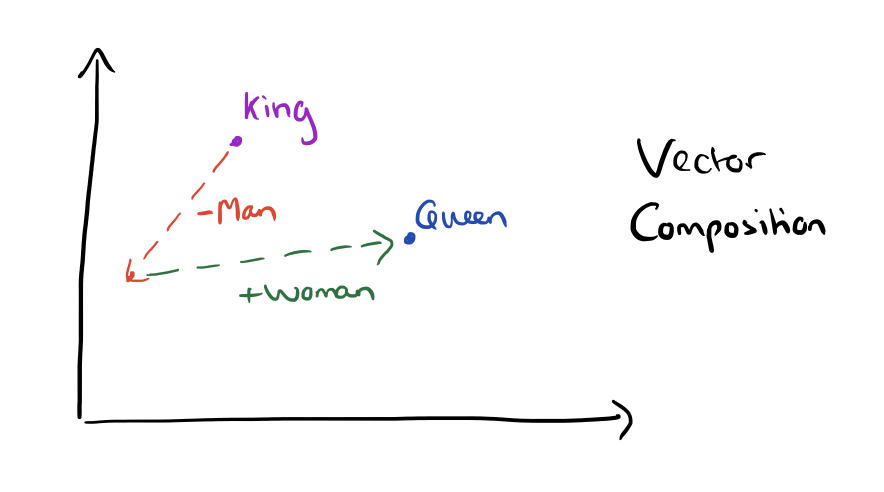

In [9]:
analogy('japan', 'japanese', 'australia')

'australian'

In [10]:
analogy('australia', 'beer', 'france')

'champagne'

In [11]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [12]:
analogy('tall', 'tallest', 'long')

'longest'

In [13]:
analogy('good', 'fantastic', 'bad')

'terrible'

Here are some more results achieved using the same technique:

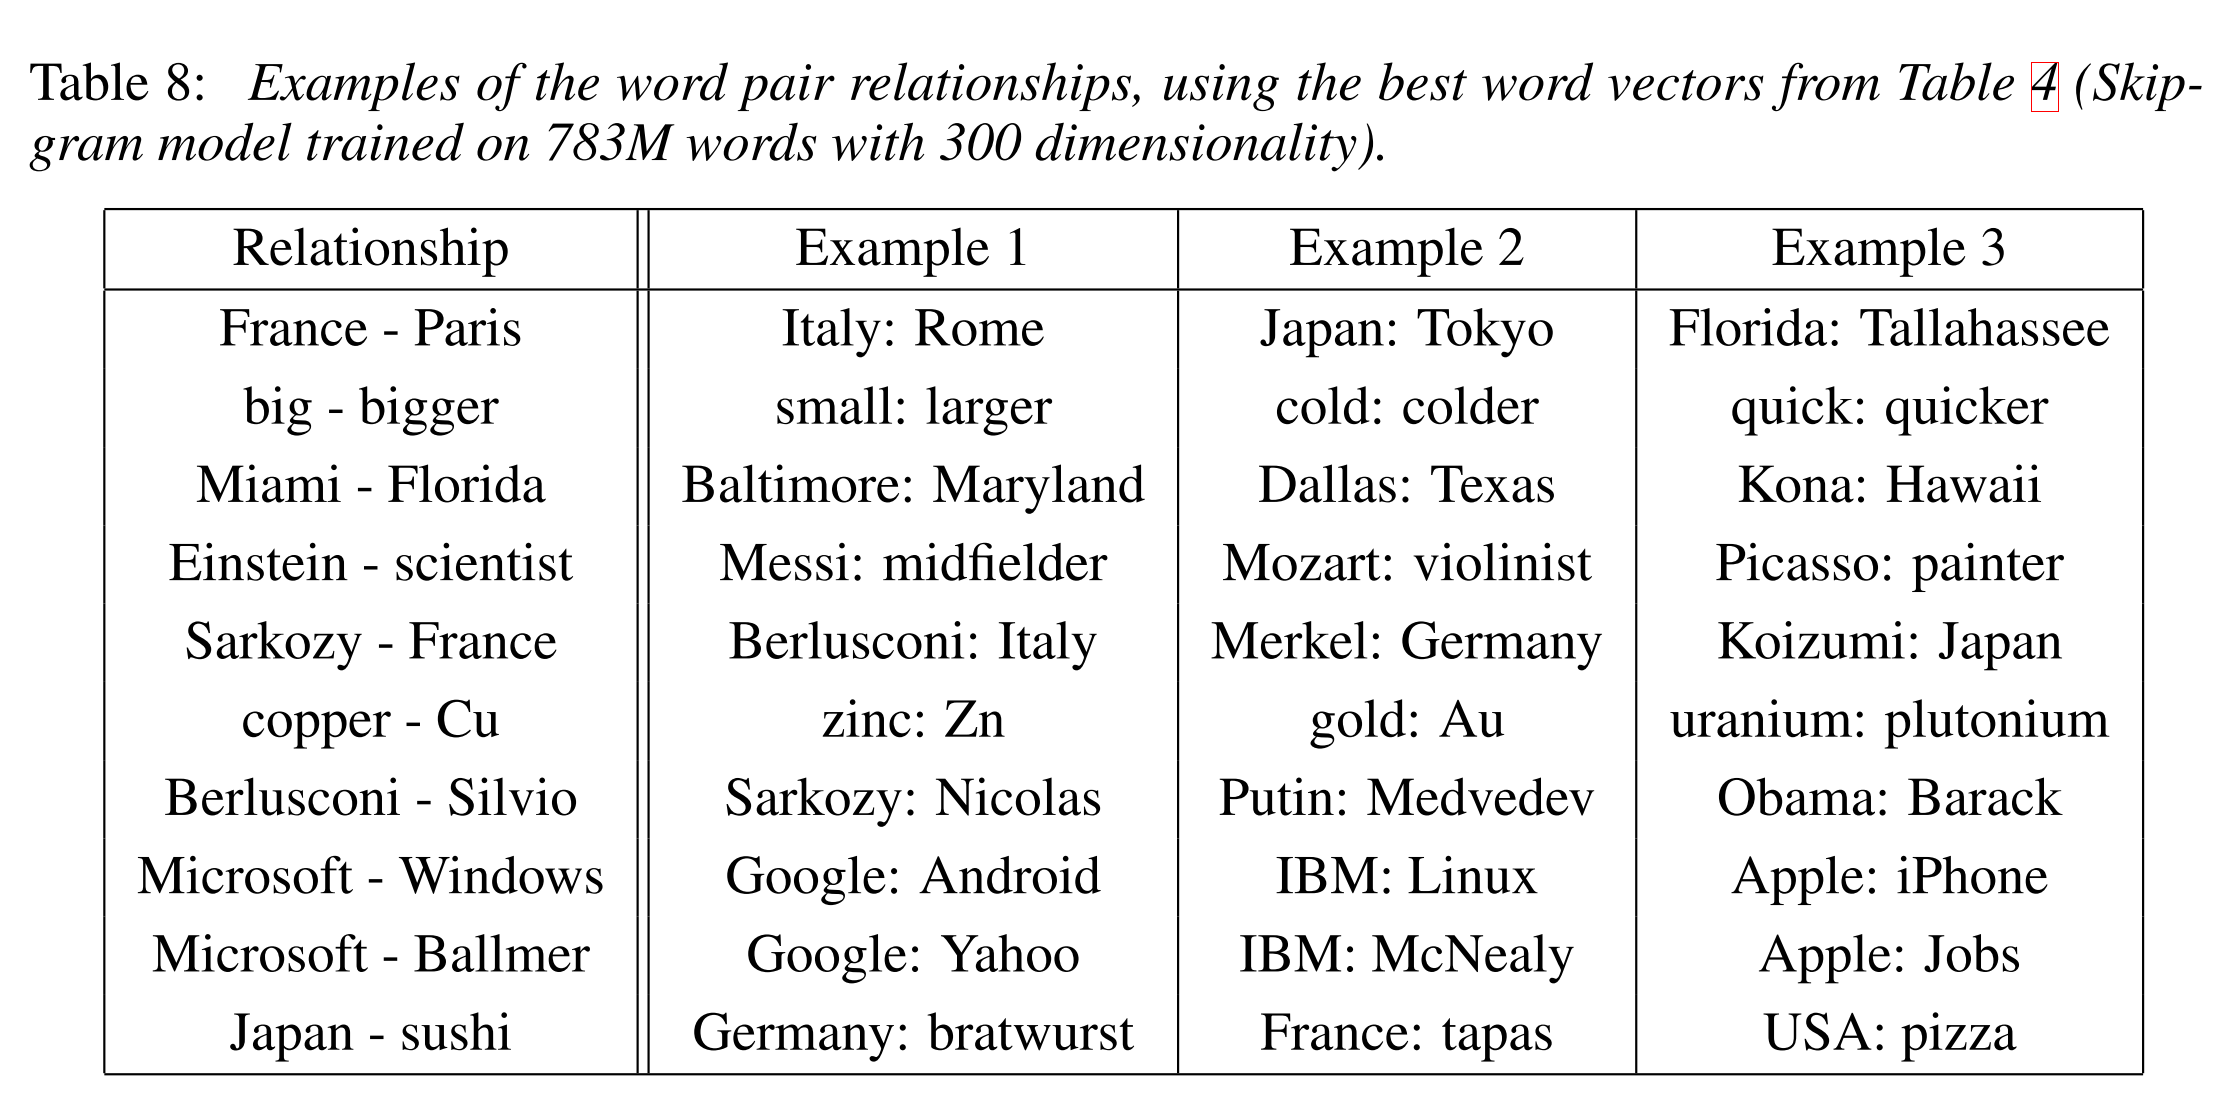

In [14]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [20]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words is None:
        if sample > 0:
            words = np.random.choice(list(model.index_to_key), sample)
        else:
            words = [ word for word in model.index_to_key ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [21]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>

In [19]:
display_pca_scatterplot(model, sample=300)

<IPython.core.display.Javascript object>